# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

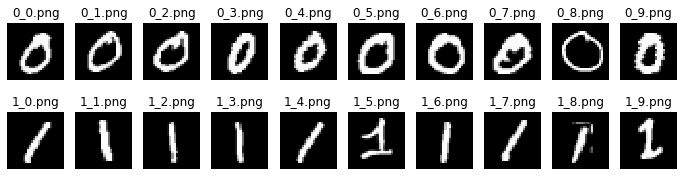

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors

The idea behind fourier descriptors is as follows:

For $(x_k, y_k)$ as $N$ successive points of the contour of the object we are interested in, we define each of these points as a complex number : $u_k = x_k + jy_k$.

We then take a $N$ point DFT of these points and what we get are the fourier descriptors of the image.
The fourier transform of the contours gives a decomposition in frequencies.

In [3]:
from skimage import measure, transform, morphology
import numpy as np

As the first step to obtain the fourier descriptors, we would like to pre-process the image, and then find the contour corresponding to the digit.

For pre-processing, we first do a thresholding, so that we now have a binary image, instead of s grayscale one. Next, we do a binary-opening. We do this because there might be other small noise present in the image apart from the digit, which we are not interested in. So a binary opening will get rid of these smaller artefacts.

Next, we do a contour detection, and consider the largest contour. This is because in our image, the digi of interest will correspond to the largest contour.

In [4]:
def pre_process(im):
    return morphology.binary_opening(im>5, np.ones([2,2]))

In [5]:
def get_contour(im):
    contours = measure.find_contours(im,0)
    contours.sort(key = lambda c: c.shape[0], reverse=True)
    return contours[0]

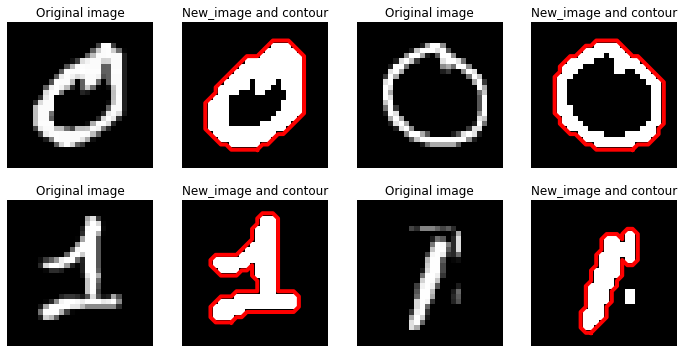

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes[0][0].imshow(zeros_im[2], cmap='gray')
axes[0][0].set_title('Original image')
axes[0][0].axis('off')
axes[0][1].imshow(pre_process(zeros_im[2]), cmap='gray')
axes[0][1].set_title('New_image and contour')
axes[0][1].axis('off')
c = get_contour(pre_process(zeros_im[2]))
axes[0][1].plot(c[:,1],c[:,0], color ='red', linewidth=4)

axes[0][2].imshow(zeros_im[8], cmap='gray')
axes[0][2].set_title('Original image')
axes[0][2].axis('off')
axes[0][3].imshow(pre_process(zeros_im[8]), cmap='gray')
axes[0][3].set_title('New_image and contour')
axes[0][3].axis('off')
c = get_contour(pre_process(zeros_im[8]))
axes[0][3].plot(c[:,1],c[:,0], color ='red', linewidth=4)

axes[1][0].imshow(ones_im[5], cmap='gray')
axes[1][0].set_title('Original image')
axes[1][0].axis('off')
axes[1][1].imshow(pre_process(ones_im[5]), cmap='gray')
axes[1][1].set_title('New_image and contour')
axes[1][1].axis('off')
c = get_contour(pre_process(ones_im[5]))
axes[1][1].plot(c[:,1],c[:,0], color ='red', linewidth=4)

axes[1][2].imshow(ones_im[8], cmap='gray')
axes[1][2].set_title('Original image')
axes[1][2].axis('off')
axes[1][3].imshow(pre_process(ones_im[8]), cmap='gray')
axes[1][3].set_title('New_image and contour')
axes[1][3].axis('off')
c = get_contour(pre_process(ones_im[8]))
axes[1][3].plot(c[:,1],c[:,0], color ='red', linewidth=4)

In this image above, we see the original image, alongside the pre-processed image and the contour we detected. 

Next, we perform the DFT by considering each point on the contour as a complex number. We thus get $f_l$ as the fourier descriptors of the image. 

We know the following:
1. Translation only affects $f_0$
2. Rotation only affects the phase of the descriptors
3. Scaling does not change the ratio $f_i/f_j$
4. Choice of starting point only affects the phase of the descriptors.

Hence, to make our 2-D features to be invariant of all of the above, we choose our features as: $abs(f_2/f_1)$ and $abs(f_3/f_1)$.

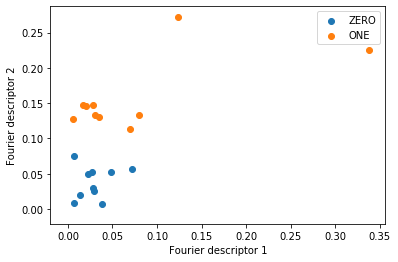

In [9]:
feature_x_zero = []
feature_y_zero = []
feature_x_ones = []
feature_y_ones = []

for im in zeros_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_zero.append(abs(uk_fft[2]/(norm)))
    feature_y_zero.append(abs(uk_fft[3]/(norm)))

for im in ones_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_ones.append(abs(uk_fft[2]/(norm)))
    feature_y_ones.append(abs(uk_fft[3]/(norm)))
                          
plt.scatter(feature_x_zero, feature_y_zero, label='ZERO')
plt.scatter(feature_x_ones, feature_y_ones, label='ONE')
plt.xlabel('Fourier descriptor 1')
plt.ylabel('Fourier descriptor 2')
plt.legend()

**Conclusion** : We see above the features for ZEROS and ONES. We see that the features we obtain do form clusters. However, for ONES, the intra-class variance is quite high. We have two clear outliers. Exploring further, we see that these outliers correspond to images 1_5 and 1_9. This is because the contours for these have a slightly different shape than the other ONE images.

Now, let us explore the effect of translation, rotation and scaling on these features.

#### Effect of rotation

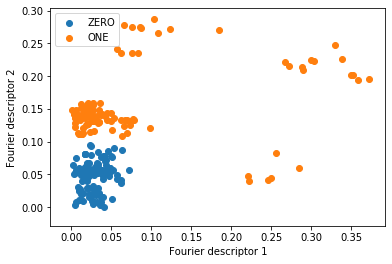

In [10]:
feature_x_zero = []
feature_y_zero = []
feature_x_ones = []
feature_y_ones = []

for im in zeros_im:
    for angle in list(range(0,360,30)):
        tmp = get_contour(transform.rotate(pre_process(im),angle))
        uk = tmp[:,1] + 1j*tmp[:,0]
        uk_fft = np.fft.fft(uk)
        norm = (uk_fft[1])    
        feature_x_zero.append(abs(uk_fft[2]/(norm)))
        feature_y_zero.append(abs(uk_fft[3]/(norm)))
        
for im in ones_im:
    for angle in list(range(0,360,30)):
        tmp = get_contour(transform.rotate(pre_process(im),angle))
        uk = tmp[:,1] + 1j*tmp[:,0]
        uk_fft = np.fft.fft(uk)
        norm = (uk_fft[1])    
        feature_x_ones.append(abs(uk_fft[2]/(norm)))
        feature_y_ones.append(abs(uk_fft[3]/(norm)))

plt.scatter(feature_x_zero, feature_y_zero, label='ZERO')
plt.scatter(feature_x_ones, feature_y_ones, label='ONE')
plt.xlabel('Fourier descriptor 1')
plt.ylabel('Fourier descriptor 2')
plt.legend()

#### Effect of scaling

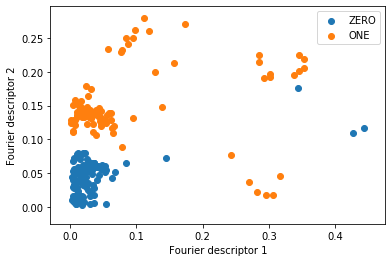

In [11]:
feature_x_zero = []
feature_y_zero = []
feature_x_ones = []
feature_y_ones = []
scale_list = [0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]

for im in zeros_im:
    for scale in scale_list:
        tmp = get_contour(transform.rescale(pre_process(im),scale))
        uk = tmp[:,1] + 1j*tmp[:,0]
        uk_fft = np.fft.fft(uk)
        norm = (uk_fft[1])    
        feature_x_zero.append(abs(uk_fft[2]/(norm)))
        feature_y_zero.append(abs(uk_fft[3]/(norm)))
        
for im in ones_im:
    for scale in scale_list:
        tmp = get_contour(transform.rescale(pre_process(im),scale))
        uk = tmp[:,1] + 1j*tmp[:,0]
        uk_fft = np.fft.fft(uk)
        norm = (uk_fft[1])    
        feature_x_ones.append(abs(uk_fft[2]/(norm)))
        feature_y_ones.append(abs(uk_fft[3]/(norm)))

plt.scatter(feature_x_zero, feature_y_zero, label='ZERO')
plt.scatter(feature_x_ones, feature_y_ones, label='ONE')
plt.xlabel('Fourier descriptor 1')
plt.ylabel('Fourier descriptor 2')
plt.legend()

**Conclusion** : As we see in each of the above plots, the features we have derived from the Fourier Descriptors are mainly invariant to scaling, rotation, with the exception of a few outliers. Also, the intra-cluster distance for ONES is quite large.

In order to obtain tighter clusters, we can consider other features, some of which we describe in the section below.

### 1.3 Additional method(s)
Add your implementation and discussion

### T-SNE

T-SNE state t-distributed statistics neighborhood embedding system. PCA is a very simple old technique but now a day T-SNE used widely. all cases where PCA have limitation T-SNE can be used. PCA preserve global structure while T-SNE can preserve the local structure. it is an iterative algorithm where at every iteration, it tries to reach a better solution.

Taking every point in high dimensional space and place it into low dimensional space such that it preserves the neighborhood distance between points like X1 and X2 same as in low dimension space X1' and X2'. It does not give any guarantee about the points which is not neighborhood points. t-sne try to keep neighborhood point as close as possible and non-neighborhood point as far away from possible.

In [13]:
import numpy as np
data = np.zeros((20,784))
ind = 0
for im in zeros_im:
    data[ind,:] = im.reshape(784)
    ind+=1
    
for im in ones_im:
    data[ind,:] = im.reshape(784)
    ind+=1

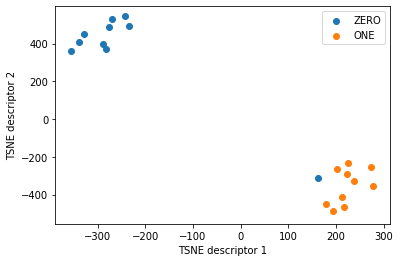

In [14]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=4, n_iter=5000)
tsne_data = model.fit_transform(data)

plt.scatter(tsne_data[0:10,0],tsne_data[0:10,1], label='ZERO')
plt.scatter(tsne_data[10:20,0],tsne_data[10:20,1], label='ONE')
plt.xlabel('TSNE descriptor 1')
plt.ylabel('TSNE descriptor 2')
plt.legend()

**Conclusion** : As we can see above, this method works quite well for our case. We can see two distinct clusters, with high inter-cluster distance and low intra-cluster distance. We have a single outlier, which is because of the fact that the ZERO (0_7) in question has a slightly altered structure.

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

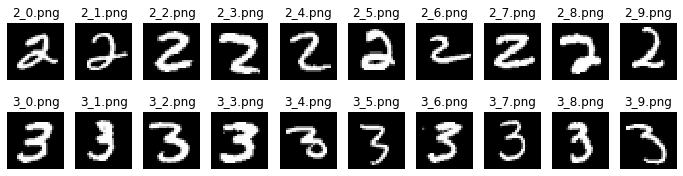

In [15]:
#  Load zeros
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load ones
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
Add your implementations and discussions here

### Fourier Descriptors

We now apply the same fourier descriptors as we did for zeros and ones.

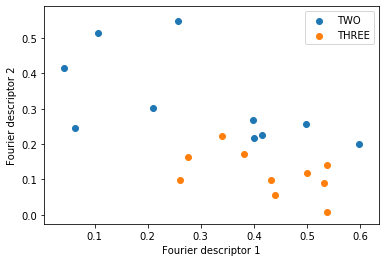

In [16]:
feature_x_two = []
feature_y_two = []
feature_x_three = []
feature_y_three = []

for im in twos_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_two.append(abs(uk_fft[2]/(norm)))
    feature_y_two.append(abs(uk_fft[3]/(norm)))

for im in threes_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_three.append(abs(uk_fft[2]/(norm)))
    feature_y_three.append(abs(uk_fft[3]/(norm)))
                          
plt.scatter(feature_x_two, feature_y_two, label='TWO')
plt.scatter(feature_x_three, feature_y_three, label='THREE')
plt.xlabel('Fourier descriptor 1')
plt.ylabel('Fourier descriptor 2')
plt.legend()

**Conclusion** : We observe that Fourier Descriptors are not good enough to separate TWOS and THREES images. This moght be the case because the fourier frequencies of these two numbers are quite similar and not quite good enough to differentiate between the two.

We also now plot the Fourier Descriptors of all four numbers on the same plot and observe.

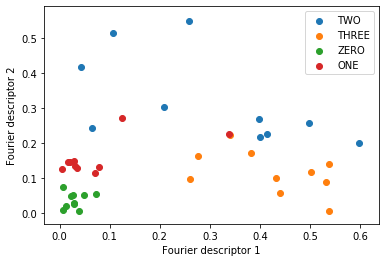

In [17]:
feature_x_zero = []
feature_y_zero = []
feature_x_ones = []
feature_y_ones = []

for im in zeros_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_zero.append(abs(uk_fft[2]/(norm)))
    feature_y_zero.append(abs(uk_fft[3]/(norm)))

for im in ones_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_ones.append(abs(uk_fft[2]/(norm)))
    feature_y_ones.append(abs(uk_fft[3]/(norm)))
    
feature_x_two = []
feature_y_two = []
feature_x_three = []
feature_y_three = []

for im in twos_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_two.append(abs(uk_fft[2]/(norm)))
    feature_y_two.append(abs(uk_fft[3]/(norm)))

for im in threes_im:
    tmp = get_contour(pre_process(im))
    uk = tmp[:,1] + 1j*tmp[:,0]
    uk_fft = np.fft.fft(uk)
    norm = (uk_fft[1])
    feature_x_three.append(abs(uk_fft[2]/(norm)))
    feature_y_three.append(abs(uk_fft[3]/(norm)))
                          
plt.scatter(feature_x_two, feature_y_two, label='TWO')
plt.scatter(feature_x_three, feature_y_three, label='THREE')                          
plt.scatter(feature_x_zero, feature_y_zero, label='ZERO')
plt.scatter(feature_x_ones, feature_y_ones, label='ONE')
plt.xlabel('Fourier descriptor 1')
plt.ylabel('Fourier descriptor 2')
plt.legend()

**Conclusion** : Clearly, we see that Fourier Descriptors are not enough to separate all four numbers. Hence, we would need to rely on one of additional methods discussed below.

### T-SNE

In [18]:
import numpy as np
data1 = np.zeros((40,784))
ind = 0
for im in zeros_im:
    data1[ind,:] = im.reshape(784)
    ind+=1
    
for im in ones_im:
    data1[ind,:] = im.reshape(784)
    ind+=1

for im in twos_im:
    data1[ind,:] = im.reshape(784)
    ind+=1
    
for im in threes_im:
    data1[ind,:] = im.reshape(784)
    ind+=1

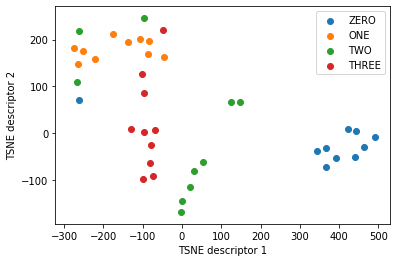

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=4, n_iter=5000)
tsne_data = model.fit_transform(data1)

plt.scatter(tsne_data[0:10,0],tsne_data[0:10,1], label='ZERO')
plt.scatter(tsne_data[10:20,0],tsne_data[10:20,1], label='ONE')
plt.scatter(tsne_data[20:30,0],tsne_data[20:30,1], label='TWO')
plt.scatter(tsne_data[30:40,0],tsne_data[30:40,1], label='THREE')
plt.xlabel('TSNE descriptor 1')
plt.ylabel('TSNE descriptor 2')

plt.legend()

**Conclusion** :We observe that the clusters are not good enough to be able to separate the four digits from each other. The problem is when we revel the image, we are losing neighborhood information.